# Implementation of K-Means clustering, Hierarchical Clustering, and DBSCAN to Amazon food reviews dataset 

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans

# Load data

In [48]:
#Data here used is preprocessed(deduplication,removal of html tags,punctuation,stop words,stemming)
con =sqlite3.connect(r'C:\Users\Friend\AI\AI_datasets\Amazon\cleaned_database.sqlite')
filtered_data  = pd.read_sql_query('SELECT * FROM Reviews WHERE Score != 3',con)
filtered_data = filtered_data.drop('index',axis = 1)
filtered_data = filtered_data.drop('Score',axis = 1)
filtered_data = filtered_data.sort_values('Time')

In [3]:
data = filtered_data.head(100000)
data.columns
data = data['CleanedText']

# Featurization(BOW)

In [4]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
vocabulary = count_vect.fit_transform(data)
bag_of_words_data = count_vect.transform(data)
print(bag_of_words_data.shape)

(100000, 37164)


# K-Means Clustering:

In [7]:
k = range(10,30,5)
k

range(10, 30, 5)

In [8]:
inertia = []
for k_value in k:
    model = KMeans(n_clusters = k_value)
    model.fit(bag_of_words_data)
    inertia.append(model.inertia_)

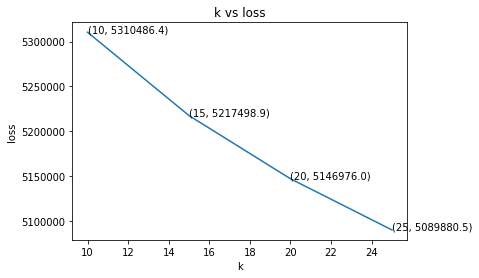

In [10]:
plt.plot(k,inertia)
for xy in zip(k,np.round(inertia,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('k')
plt.ylabel('loss')
plt.title('k vs loss')
plt.show()

In [5]:
model = KMeans(n_clusters = 20)
model.fit(bag_of_words_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
# Analysing features belonging to same cluster
cluster_01 = {i: bag_of_words_data[np.where(model.labels_ == i)] for i in range(model.n_clusters)}
index = {i: np.where(model.labels_ == i) for i in range(model.n_clusters)}

#Get indices of cluster 0
indices_0 = cluster_01[0].toarray()

#print five reviews from cluster 0
set1_0 = np.nonzero(indices_0[0])
set1_1 = np.nonzero(indices_0[1])
set1_2 = np.nonzero(indices_0[2])
set1_3 = np.nonzero(indices_0[3])
set1_4 = np.nonzero(indices_0[4])

features_set1_0 = [np.take(count_vect.get_feature_names(),indx)  for indx in set1_0]
features_set1_1 =  [np.take(count_vect.get_feature_names(),indx)  for indx in set1_1]
features_set1_2 =  [np.take(count_vect.get_feature_names(),indx)  for indx in set1_2]
features_set1_3 =  [np.take(count_vect.get_feature_names(),indx)  for indx in set1_3]
features_set1_4 =  [np.take(count_vect.get_feature_names(),indx)  for indx in set1_4]

In [14]:
from wordcloud import WordCloud

featurez0 = (" ").join(features_set1_0[0])
featurez1 = (" ").join(features_set1_1[0])
featurez2 = (" ").join(features_set1_2[0])
featurez3 = (" ").join(features_set1_3[0])
featurez4 = (" ").join(features_set1_4[0])


wordcloud0 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez0) 
wordcloud1 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez1) 
wordcloud2 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez2) 
wordcloud3 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez3) 
wordcloud4 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez4)

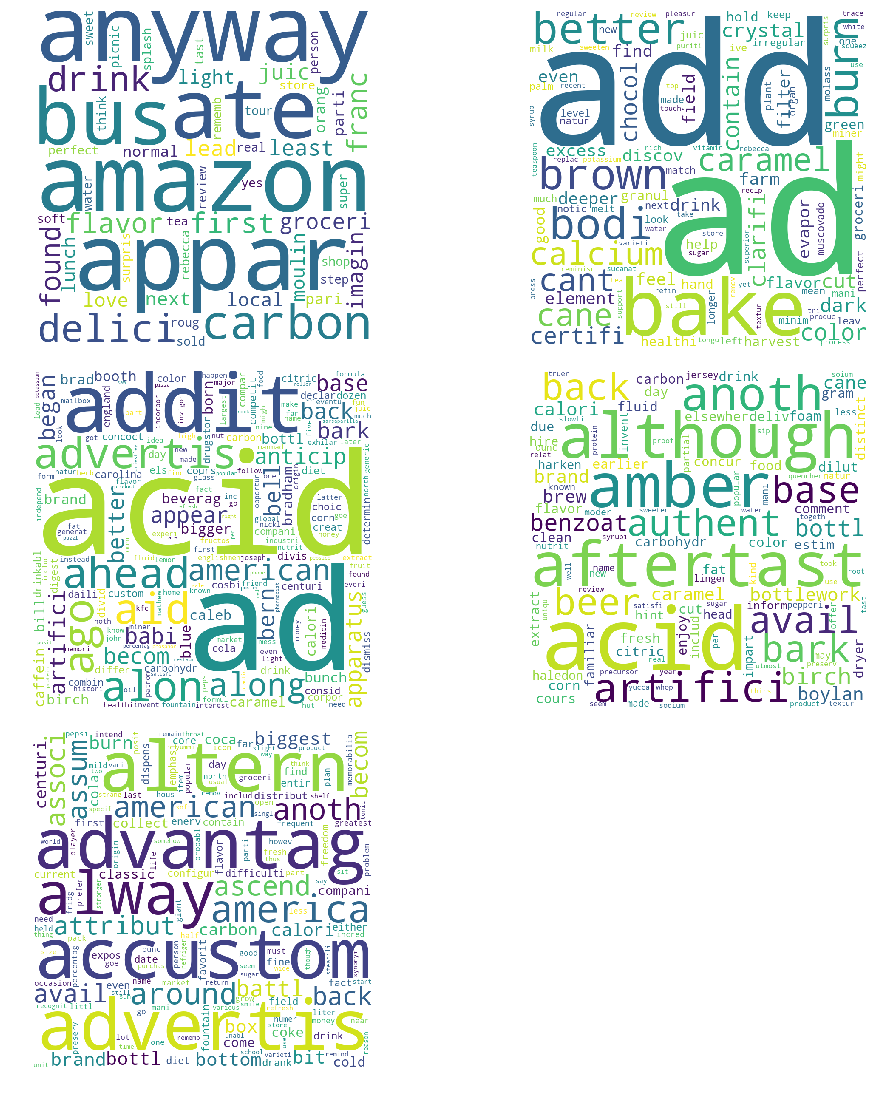

In [20]:
plt.figure(figsize = (15,15), facecolor = None) 
plt.subplot(3,2,1)
plt.imshow(wordcloud0) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.subplot(3,2,2)
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.subplot(3,2,3)
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.subplot(3,2,4)
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.subplot(3,2,5)
plt.imshow(wordcloud4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Hierarchical Clustering

In [21]:
data = filtered_data.head(5000)
data.columns
data = data['CleanedText']

In [22]:
# Performing BOW on review
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
vocabulary = count_vect.fit_transform(data)
bag_of_words_data = count_vect.transform(data)
print(bag_of_words_data.shape)

(5000, 11508)


In [23]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(bag_of_words_data.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x00000201C2D97488>)

In [39]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
model.fit(bag_of_words_data.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x00000201C2D97488>)

In [42]:
# Analysing features belonging to same cluster
clusters = {i: bag_of_words_data[np.where(model.labels_ == i)] for i in range(model.n_clusters)}
index = {i: np.where(model.labels_ == i) for i in range(model.n_clusters)}

cluster0 = [np.take(count_vect.get_feature_names(),indx)  for indx in index[0]]
cluster1 = [np.take(count_vect.get_feature_names(),indx)  for indx in index[1]]
cluster2 = [np.take(count_vect.get_feature_names(),indx)  for indx in index[2]]
cluster3 = [np.take(count_vect.get_feature_names(),indx)  for indx in index[3]]
cluster4 = [np.take(count_vect.get_feature_names(),indx)  for indx in index[4]]

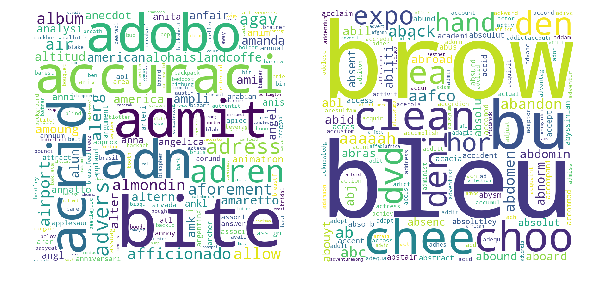

In [46]:
from wordcloud import WordCloud

featurez0 = (" ").join(cluster0[0])
featurez1 = (" ").join(cluster1[0])


wordcloud0 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez0) 
wordcloud1 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(featurez1)

plt.figure(figsize = (8,8), facecolor = None) 
plt.subplot(1,2,1)
plt.imshow(wordcloud0) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.subplot(1,2,2)
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [162]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=10)
model.fit(bag_of_words_data.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x000002C78E256488>)

In [163]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=15)
model.fit(bag_of_words_data.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=15,
            pooling_func=<function mean at 0x000002C78E256488>)

# DBSCAN

In [49]:
data = filtered_data.head(30000)
data.columns
data = data['CleanedText']

In [50]:
from gensim.models import Word2Vec

list_of_sent=[]
for sent in data:
    list_of_sent.append(sent.split())

#word2vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

#Average word2vec
sent_vectors_data = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_data.append(sent_vec)

C:\Users\Friend\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
from sklearn.neighbors import NearestNeighbors

#hyperparameters:
min_samples = 100

#Perform Elbow method
nbrs = NearestNeighbors(n_neighbors=4).fit(sent_vectors_data)
distances, indices = nbrs.kneighbors(sent_vectors_data)

In [190]:
distances = distances[:,3]
distances = np.sort(distances)
distances.shape

(30000,)

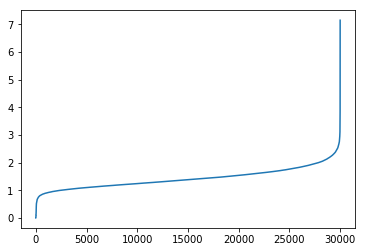

In [191]:
plt.plot(distances)

# modelling with different eps

In [53]:
#considering eps at 2
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2, min_samples=min_samples)
model.fit(sent_vectors_data)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

In [67]:
val = set(model.labels_)
index = {i: np.where(model.labels_ == i) for i in val}
index

{0: (array([    0,     1,     2, ..., 29997, 29998, 29999], dtype=int64),),
 -1: (array([  293,   349,   490,  1013,  1134,  1345,  1626,  1698,  1980,
          2001,  2007,  2076,  2095,  2769,  2785,  2912,  3070,  3274,
          3323,  3645,  3653,  3666,  3722,  3781,  3808,  4142,  4442,
          4443,  4532,  4682,  4685,  4811,  4969,  5136,  5167,  5173,
          5321,  5451,  5735,  5876,  5927,  5932,  6163,  6270,  6275,
          6327,  6426,  6435,  6551,  6555,  6892,  6954,  6958,  7004,
          7123,  7183,  7713,  7837,  8117,  8191,  8423,  8446,  8456,
          8554,  8578,  9239,  9279,  9382,  9417,  9497,  9539,  9678,
          9693,  9935, 10023, 10136, 10156, 10190, 10199, 10278, 10545,
         10628, 10744, 10889, 11071, 11074, 11224, 11245, 11321, 11700,
         11837, 11859, 11890, 12168, 12175, 12176, 12177, 12198, 12283,
         12827, 12954, 12991, 13073, 13075, 13203, 13880, 13973, 14233,
         14845, 14847, 15580, 15645, 15662, 15753, 15828

In [193]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.8, min_samples=min_samples)
model.fit(sent_vectors_data)

DBSCAN(algorithm='auto', eps=1.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

In [61]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2.5, min_samples=min_samples)
model.fit(sent_vectors_data)

DBSCAN(algorithm='auto', eps=2.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)